In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

In [6]:
df = pd.read_csv('../../Dataset/training date.csv')
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,326,1,2010-10-25,ADESA,2008,2,KIA,SPECTRA,EX,4D SEDAN EX,...,9605.0,10650.0,NaN,NaN,5546,33619,FL,6100.0,0,533
1,42991,0,2009-05-27,MANHEIM,2006,3,DODGE,STRATUS V6 2.7L V6 M,SXT,4D SEDAN SXT FFV,...,6418.0,7478.0,NaN,NaN,99750,32124,FL,4000.0,0,1630
2,55273,0,2010-03-18,OTHER,2008,2,DODGE,CALIBER,SE,4D WAGON,...,10721.0,11350.0,NaN,NaN,99761,74135,OK,7500.0,0,693
3,29058,0,2009-08-06,OTHER,2005,4,FORD,FREESTAR FWD V6 3.9L,S,PASSENGER 3.9L,...,5702.0,7691.0,NaN,NaN,99761,85018,AZ,4725.0,0,1633
4,34991,0,2009-04-03,MANHEIM,2005,4,CHRYSLER,TOWN & COUNTRY FWD V,Bas,MINIVAN 3.3L,...,6300.0,7856.0,NaN,NaN,20833,75236,TX,5670.0,0,1623


In [8]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [11]:
(df == 0).sum(axis=0)

RefId                                    0
IsBadBuy                             51178
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               1
Make                                     0
Model                                    0
Trim                                     0
SubModel                                 0
Color                                    0
Transmission                             0
WheelTypeID                              4
WheelType                                0
VehOdo                                   0
Nationality                              0
Size                                     0
TopThreeAmericanName                     0
MMRAcquisitionAuctionAveragePrice      648
MMRAcquisitionAuctionCleanPrice        552
MMRAcquisitionRetailAveragePrice       648
MMRAcquisitonRetailCleanPrice          648
MMRCurrentAuctionAveragePrice          393
MMRCurrentA

In [12]:
df.isnull().sum()

RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  1911
SubModel                                 7
Color                                    7
Transmission                             8
WheelTypeID                           2573
WheelType                             2577
VehOdo                                   0
Nationality                              4
Size                                     4
TopThreeAmericanName                     4
MMRAcquisitionAuctionAveragePrice       13
MMRAcquisitionAuctionCleanPrice         13
MMRAcquisitionRetailAveragePrice        13
MMRAcquisitonRetailCleanPrice           13
MMRCurrentAuctionAveragePrice          245
MMRCurrentA

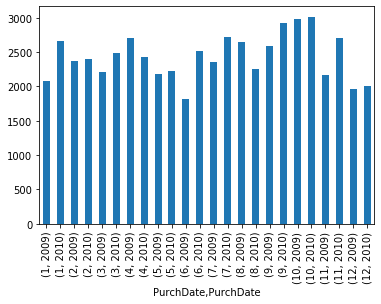

In [22]:
#analisi per attributo senza le correzioni
#PurchDate
#MissingValues=0
#Outliers=0
#Distribution
df["PurchDate"] = df["PurchDate"].astype("datetime64")
df.groupby([df["PurchDate"].dt.month, df["PurchDate"].dt.year ])["PurchDate"].count().plot(kind="bar")

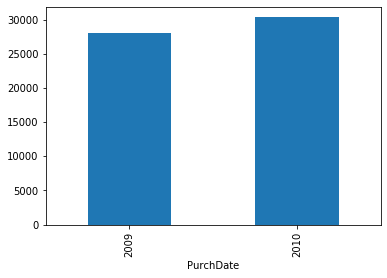

In [24]:
df.groupby(df["PurchDate"].dt.year)["PurchDate"].count().plot(kind="bar")

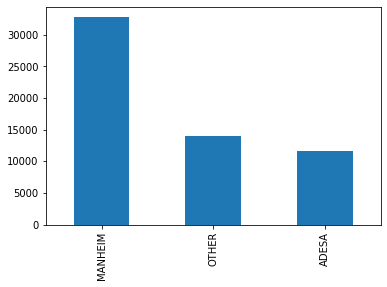

In [27]:
#Auction (3 distinct values)
#missing values=0
#outliers=0
#distribution
df["Auction"].value_counts().plot(kind="bar")

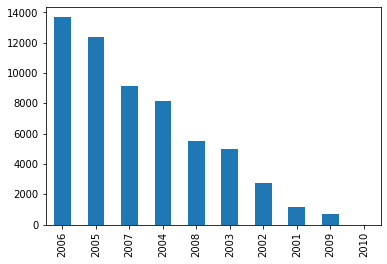

In [29]:
#VehYear (10 distinct values)
#missing values=0
#outliers=0
#distribution
df["VehYear"].value_counts().plot(kind="bar")

In [32]:
#Possible outlier (it isn't)
df.loc[df['VehYear']==2010]['VehYear'].count()

1

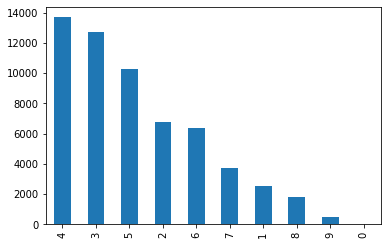

In [35]:
#VehAge (10 distinct values)
#missing values=0
#outliers=0
#distribution
df["VehicleAge"].value_counts().plot(kind="bar")

In [39]:
#Possible outlier (it isn't)
df.loc[df['VehicleAge']==0]['VehicleAge'].count()

1

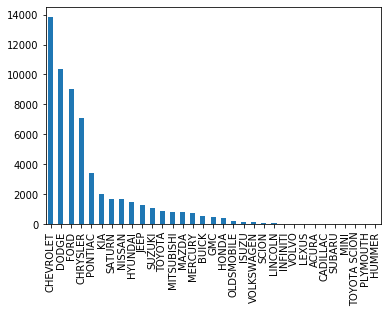

In [91]:
#Make (33 distinct values)
#missing values=0
#outliers=1 + 2 Possible outliers
#distribution
df["Make"].value_counts().plot(kind="bar")

In [92]:
df["Make"].nunique()

33

In [44]:
#Eliminare TOYOTA SCION
df["Make"].value_counts()

CHEVROLET       13842
DODGE           10355
FORD             9000
CHRYSLER         7093
PONTIAC          3421
KIA              2006
SATURN           1698
NISSAN           1687
HYUNDAI          1444
JEEP             1287
SUZUKI           1062
TOYOTA            905
MITSUBISHI        822
MAZDA             774
MERCURY           739
BUICK             562
GMC               502
HONDA             407
OLDSMOBILE        198
ISUZU             110
VOLKSWAGEN        104
SCION             102
LINCOLN            80
INFINITI           36
VOLVO              31
LEXUS              27
ACURA              25
CADILLAC           25
SUBARU             22
MINI               17
TOYOTA SCION        1
PLYMOUTH            1
HUMMER              1
Name: Make, dtype: int64

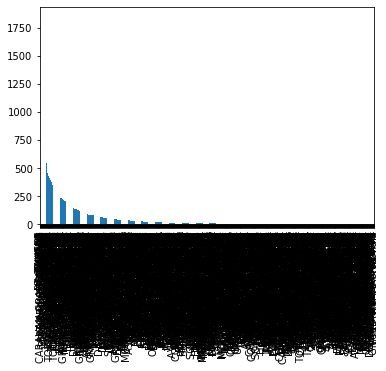

In [95]:
#Model (1029 distinct values)
#missing values=0
#outliers=(174 to 500)
#distribution
df["Model"].value_counts().plot(kind="bar")

In [54]:
#number of categories
df["Model"].nunique()

1029

In [94]:
#approximate number of outliers
ModelCount=df['Model'].value_counts()
ModelCount.loc[df['Model'].value_counts()<2].count()

174

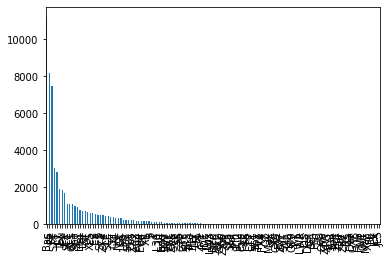

In [74]:
#Trim (131 distinc values)
#missing values=1911
#outliers=0 (8-24)
#distribution
df["Trim"].value_counts().plot(kind="bar")

In [78]:
df["Trim"].nunique()

131

In [104]:
TrimCount=df['Trim'].value_counts()
TrimCount.loc[df['Trim'].value_counts()<2].count()

8

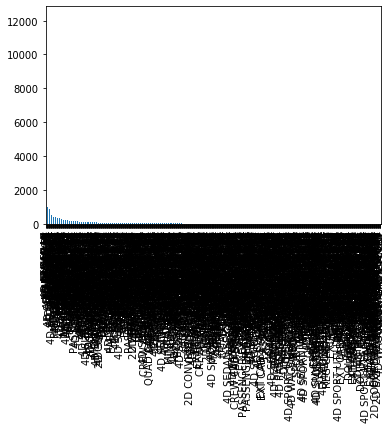

In [106]:
#SubModel (839 distinc values)
#missing values=7
#outliers=0 (175-500)
#distribution
df["SubModel"].value_counts().plot(kind="bar")

In [109]:
df["SubModel"].nunique()

839

In [114]:
TrimCount=df['SubModel'].value_counts()
TrimCount.loc[df['SubModel'].value_counts()<10].count()

486

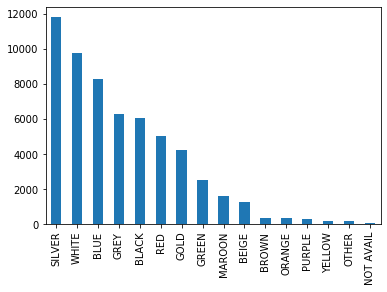

In [123]:
#Color (839 distinc values)
#missing values=7
#outliers=0 (?What about not vail or other?)
#distribution
df["Color"].value_counts().plot(kind="bar")

In [126]:
df["Color"].nunique()

16

In [134]:
ColorCount=df['Color'].value_counts()
#ColorCount.loc[df['SubModel'].value_counts()<10].count()
ColorCount

SILVER       11812
WHITE         9768
BLUE          8271
GREY          6284
BLACK         6067
RED           5020
GOLD          4244
GREEN         2561
MAROON        1628
BEIGE         1264
BROWN          350
ORANGE         340
PURPLE         294
YELLOW         200
OTHER          199
NOT AVAIL       77
Name: Color, dtype: int64

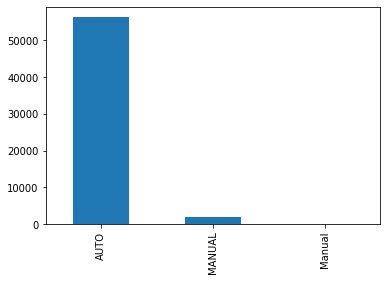

In [130]:
#Transmission (3 distinc values (2 refined))
#missing values=8
#outliers=0
#distribution
df["Transmission"].value_counts().plot(kind="bar")

In [133]:
df["Transmission"].nunique()

3

In [139]:
TransmissionCount=df['Transmission'].value_counts()
TransmissionCount

AUTO      56330
MANUAL     2047
Manual        1
Name: Transmission, dtype: int64

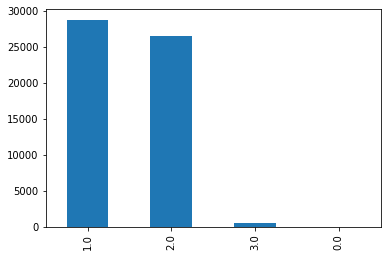

In [140]:
#WheelTypeID (4 distinc values (3 refined))
#missing values=2573+4(0)
#outliers=0
#distribution
df['WheelTypeID'].value_counts().plot(kind="bar")

In [141]:
WheelTypeIdCounter=df['WheelTypeID'].value_counts()
WheelTypeIdCounter

1.0    28735
2.0    26485
3.0      589
0.0        4
Name: WheelTypeID, dtype: int64

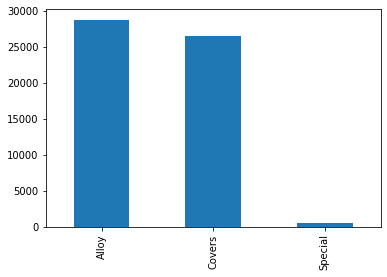

In [143]:
#WheelType (3 distinc values)
#missing values=2577
#outliers=0
#distribution
df["WheelType"].value_counts().plot(kind="bar")

In [145]:
WheelTypeIdCounter=df['WheelType'].value_counts()
WheelTypeIdCounter

Alloy      28735
Covers     26485
Special      589
Name: WheelType, dtype: int64

In [165]:
RefIdN=set(df.loc[df["WheelType"].isnull()]['RefId'].unique())
RefIdNu=set(df.loc[df["WheelTypeID"].isnull()]['RefId'].unique())
Inter=RefIdN.intersection(RefIdNu)
len(Inter)

2573

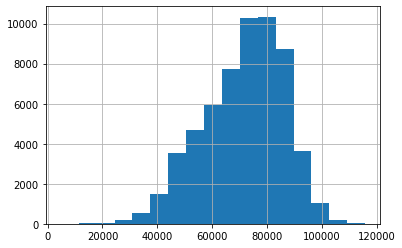

In [177]:
#VehOdo
#missing values=0
#outliers=????
#distribution (longTail Distribution on the small values)
binsN=math.ceil(math.log(df.shape[0],2))+1
df["VehOdo"].hist(bins=binsN)

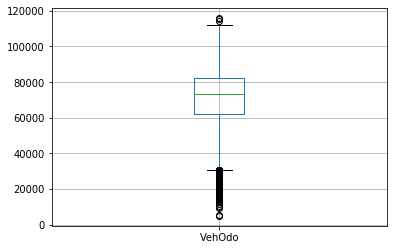

In [178]:
boxplot = df.boxplot(column=['VehOdo'])

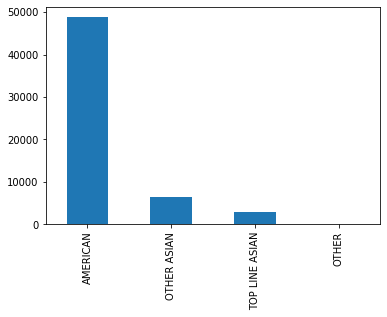

In [180]:
#Nationality (4 distinc values)
#missing values=4
#outliers=? (?154?)
#distribution
df["Nationality"].value_counts().plot(kind="bar")

In [181]:
NationalityCounter=df['Nationality'].value_counts()
NationalityCounter

AMERICAN          48800
OTHER ASIAN        6435
TOP LINE ASIAN     2995
OTHER               152
Name: Nationality, dtype: int64

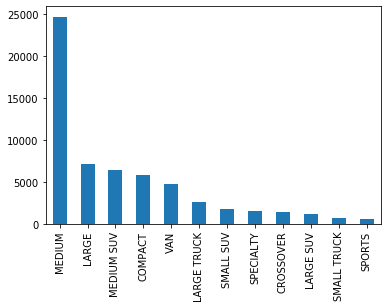

In [184]:
#Size (12 distinc values)
#missing values=4
#outliers=?
#distribution
df["Size"].value_counts().plot(kind="bar")

In [186]:
SizeCounter=df['Size'].value_counts()
SizeCounter

MEDIUM         24644
LARGE           7120
MEDIUM SUV      6398
COMPACT         5764
VAN             4677
LARGE TRUCK     2554
SMALL SUV       1805
SPECIALTY       1527
CROSSOVER       1419
LARGE SUV       1157
SMALL TRUCK      696
SPORTS           621
Name: Size, dtype: int64

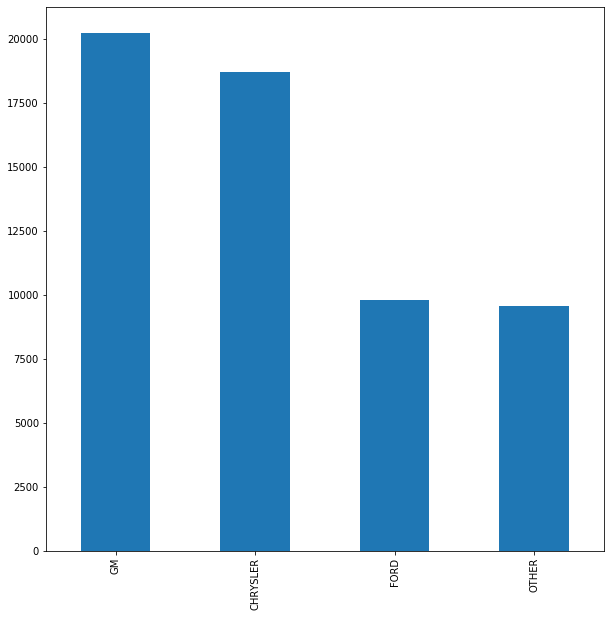

In [264]:
#TopThreeAmericanName (4 distinc values)
#missing values=4
#outliers=?
#distribution
df["TopThreeAmericanName"].value_counts().plot(kind="bar", figsize=(10, 10))

In [192]:
Top3Counter=df['TopThreeAmericanName'].value_counts()
Top3Counter

GM          20248
CHRYSLER    18733
FORD         9819
OTHER        9582
Name: TopThreeAmericanName, dtype: int64

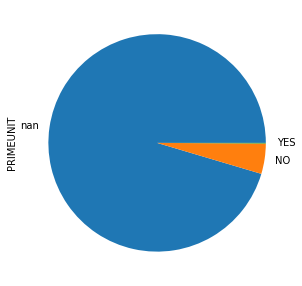

In [196]:
#PRIMEUNIT (2 distinc values)
#missing values=55703
#outliers=?
#distribution
df["PRIMEUNIT"].value_counts(dropna=False).plot.pie(y='PRIMEUNIT',figsize=(5, 5))

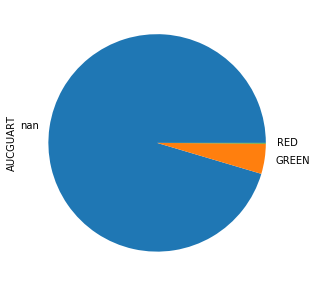

In [202]:
#AUCGUART (4 distinc values)
#missing values=55703
#outliers=?
#distribution
df["AUCGUART"].value_counts(dropna=False).plot.pie(y='AUCGUART',figsize=(5, 5))

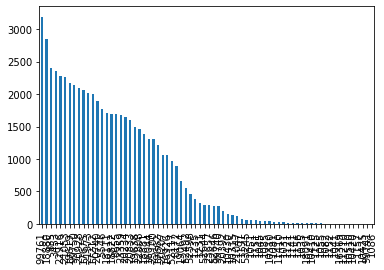

In [200]:
#BYRNO (72 distinc values)
#missing values=0
#outliers=0
#distribution
df["BYRNO"].value_counts().plot(kind="bar")

In [232]:
df["BYRNO"].nunique()

72

In [237]:
ByeCount=df['BYRNO'].value_counts()
ByeCount.loc[df['BYRNO'].value_counts()<10].count()
#df.shape[0]/df["BYRNO"].nunique()

17

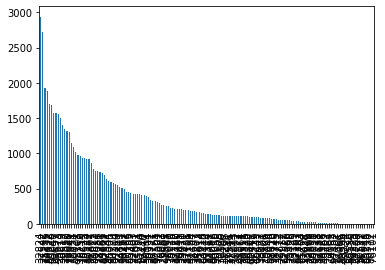

In [208]:
#VNZIP1 (152 distinc values)
#missing values=0
#outliers=0 (5)
#distribution
df["VNZIP1"].value_counts().plot(kind="bar")

In [209]:
df["VNZIP1"].nunique()

152

In [210]:
#approximate number of outliers
ZipCount=df['VNZIP1'].value_counts()
ZipCount.loc[df['VNZIP1'].value_counts()<2].count()

5

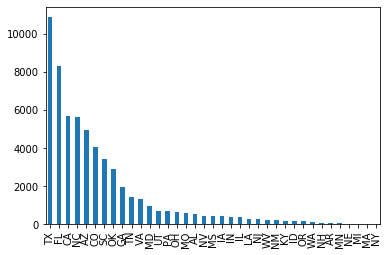

In [212]:
#VNZIP1 (37 distinc values)
#missing values=0
#outliers=0
#distribution
df["VNST"].value_counts().plot(kind="bar")

In [214]:
df["VNST"].nunique()

37

In [219]:
#approximate number of outliers
VNSTCount=df['VNST'].value_counts()
VNSTCount.loc[df['VNST'].value_counts()<2].count()

0

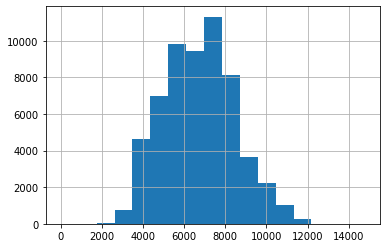

In [241]:
#VehBCost
#missing values=0
#outliers=????
#distribution (longTail Distribution on the big values values)
binsN=math.ceil(math.log(df.shape[0],2))+1
df.loc[df["VehBCost"]<15000]["VehBCost"].hist(bins=binsN)

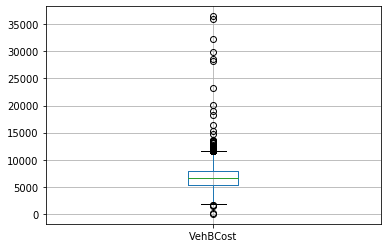

In [242]:
boxplot = df.boxplot(column=['VehBCost'])

In [265]:
df.loc[df["VehBCost"]>15000]["VehBCost"].count()

12

In [281]:
df.loc[df['Make']=='LEXUS']['VehBCost']

wout.loc[df['VehBCost']>20000]




5185      9400.62
5691     13070.02
6163     11250.00
6380     29795.00
7551      8100.00
10590    10215.00
11498    11727.64
13248     8185.00
18672     9100.00
19816    11800.00
23109    28560.00
24014    13674.57
30843     9400.00
35739     9690.00
36456     7045.00
38272     9715.00
38767    36485.00
39873     9700.00
40040    11700.00
41213    13195.00
41574     8685.00
43884     8895.00
45646     9770.00
46103     9400.00
47730    10800.00
52530    10190.00
53828     8780.00
Name: VehBCost, dtype: float64

In [263]:
df.loc[df["VehBCost"]>12000]["Model"].value_counts()

listUni=df.loc[df["VehBCost"]>12000]["Model"]#.unique()
#df.loc[df["VehBCost"] in listUni]
listUni=

#df.loc[df["Model"]=="AVALANCHE 1500 2WD V"]["VehBCost"].mean()

#df.loc[df["Model"]=="AVALANCHE 1500 2WD V"]["VehBCost"].max()

995      2500 SILVERADO PICKU
1244                     300C
1306      2500 RAM PICKUP 2WD
4049                     300C
5691                    GS300
6380               RX400H AWD
6410                   AVALON
6733                      M35
7380                      G35
8456                       TL
9142     AVALANCHE 1500 2WD V
9863       F150 PICKUP 2WD V8
10803                      TL
11700     1500 RAM PICKUP 2WD
12564       HIGHLANDER 4WD V6
13225      F150 PICKUP 4WD V8
13787       HIGHLANDER 4WD V6
14677     1500 RAM PICKUP 4WD
15270         4 RUNNER 2WD V6
15491              TOUAREG V8
19071               ACCORD V6
21637     1500 RAM PICKUP 2WD
23109                  GS450H
23502    1500 SILVERADO PICKU
24014                   GS300
28467    AVALANCHE 1500 2WD V
31737                     300
32128         4 RUNNER 4WD V6
32434    F150 PICKUP 2WD V8 4
36322     1500 RAM PICKUP 4WD
36887                FX35 AWD
36907       SUBURBAN 1500 4WD
37771      F150 PICKUP 2WD V8
38767     

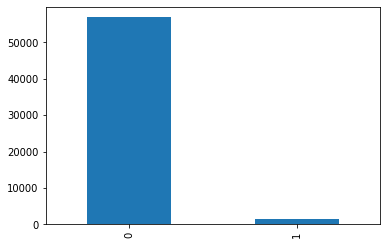

In [231]:
#IsOnlineSale (2 distinct values)
#missing values=0
#outliers=0
#distribution 
df["IsOnlineSale"].value_counts().plot(kind="bar")

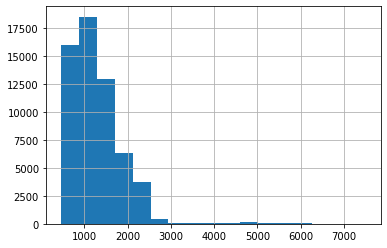

In [227]:
#WarrantyCost
#missing values=0
#outliers=????
#distribution (longTail Distribution on the big values values)
binsN=math.ceil(math.log(df.shape[0],2))+1
df["WarrantyCost"].hist(bins=binsN)

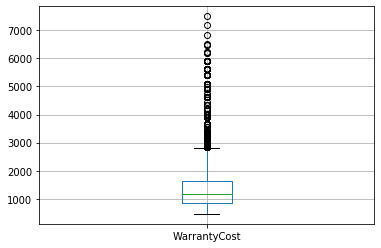

In [282]:
boxplot = df.boxplot(column=['WarrantyCost'])

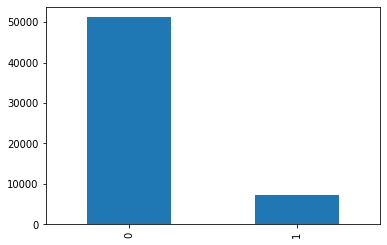

In [286]:
#BadBUY (2 distinc values)
#missing values=0
#outliers=0
#distribution
df["IsBadBuy"].value_counts().plot(kind="bar")

In [288]:
df["IsBadBuy"].value_counts()

0    51178
1     7208
Name: IsBadBuy, dtype: int64

In [308]:
table=df.loc[df['IsBadBuy']==1]['Make'].value_counts()
table

table=df.loc[df['Make']=='LEXUS']
table.loc[table['IsBadBuy']==1]

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
5185,69213,1,2009-06-11,ADESA,2006,3,LEXUS,RX330 FWD,NaN,4D SPORT UTILITY,...,20930.0,23922.0,NaN,NaN,16926,91752,CA,9400.62,0,764
5691,6270,1,2010-04-29,MANHEIM,2006,4,LEXUS,GS300,NaN,4D SEDAN,...,23951.0,26754.0,NaN,NaN,18881,30272,GA,13070.02,0,764
6380,69256,1,2009-04-12,ADESA,2007,2,LEXUS,RX400H AWD,NaN,4D SPORT UTILITY,...,32928.0,35366.0,NaN,NaN,16926,91752,CA,29795.00,0,1001
11498,33502,1,2009-12-05,MANHEIM,2006,3,LEXUS,GS300 3.0L I6 EFI,NaN,4D SEDAN,...,23327.0,26164.0,YES,GREEN,21973,34761,FL,11727.64,0,764
23109,6038,1,2010-11-23,MANHEIM,2007,3,LEXUS,GS450H,NaN,4D SEDAN HYBRID,...,29752.0,33337.0,NaN,NaN,835,85040,AZ,28560.00,0,1121
24014,15340,1,2010-06-23,MANHEIM,2006,4,LEXUS,GS300,NaN,4D SEDAN,...,23107.0,26542.0,NaN,NaN,835,94544,CA,13674.57,0,764
35739,19000,1,2009-01-09,MANHEIM,2002,7,LEXUS,ES300 3.0L V6 EFI,NaN,4D SEDAN,...,10082.0,11632.0,NaN,NaN,22916,80022,CO,9690.00,0,1497
38767,15318,1,2010-05-26,MANHEIM,2008,2,LEXUS,RX400H AWD,NaN,4D SPORT UTILITY,...,38151.0,41062.0,NaN,NaN,835,94544,CA,36485.00,0,1001
52530,19026,1,2009-09-15,MANHEIM,2002,7,LEXUS,ES300 3.0L V6 EFI,NaN,4D SEDAN,...,9976.0,11511.0,NaN,NaN,22916,80022,CO,10190.00,0,1497
